### Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Outlier Data Correction

### Introduction

This code focuses on detecting and handling outliers in delivery charge data using the **Interquartile Range (IQR) method**. It visualizes the original data distribution through histograms and box plots, identifies outliers, and caps them within calculated bounds to preserve the dataset's integrity. After capping the outliers, the code re-visualizes the modified data to compare distributions before and after the transformation. Finally, the cleaned dataset is saved for further analysis.


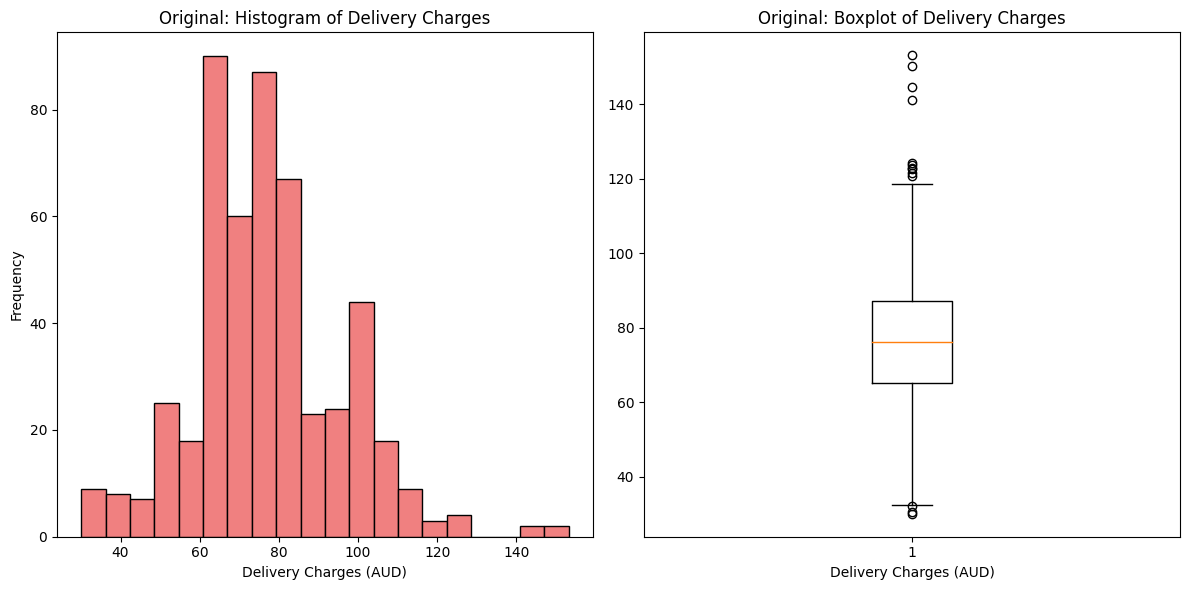

Lower Bound: 32.33874999999999, Upper Bound: 119.94875


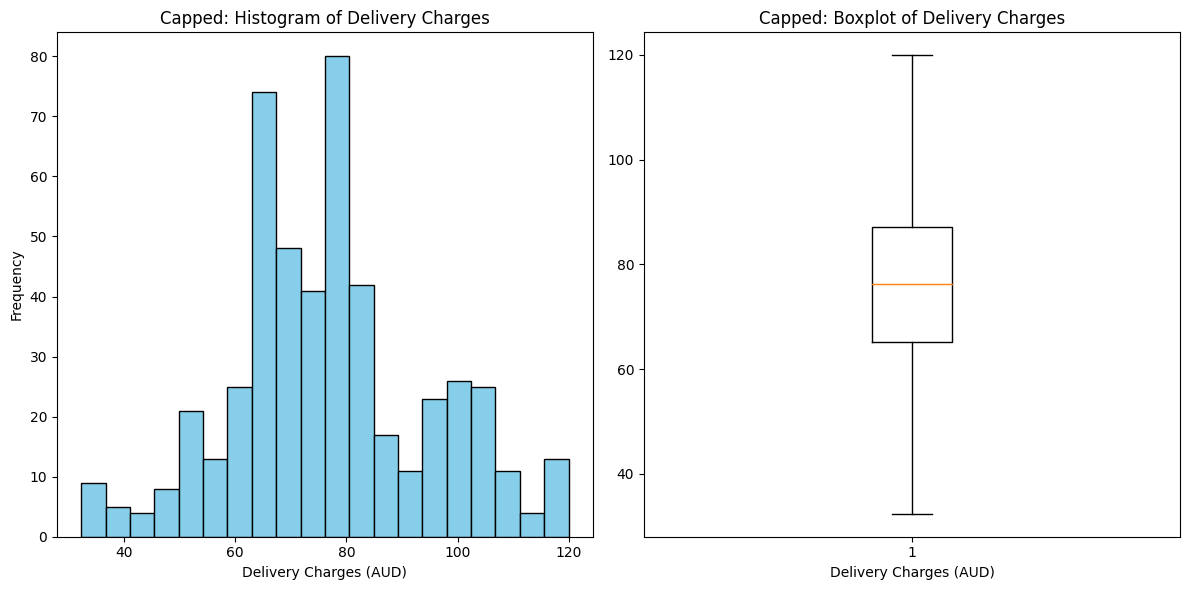

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Dataset
# We start by reading the outlier data file which contains delivery charges and other order details.
outlier_data = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group010/Group010_outlier_data.csv')

# Initial Visualization (Before Capping)
# To understand the data distribution, we create a histogram and box plot for the delivery_charges column.

plt.figure(figsize=(12, 6))

# Histogram for delivery_charges (Before capping)
plt.subplot(1, 2, 1)
plt.hist(outlier_data['delivery_charges'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Original: Histogram of Delivery Charges')
plt.xlabel('Delivery Charges (AUD)')
plt.ylabel('Frequency')

# Boxplot for delivery_charges (Before capping)
plt.subplot(1, 2, 2)
plt.boxplot(outlier_data['delivery_charges'])
plt.title('Original: Boxplot of Delivery Charges')
plt.xlabel('Delivery Charges (AUD)')

# Show the initial visualizations
plt.tight_layout()
plt.show()

# Detecting Outliers Using the IQR Method
# The Interquartile Range (IQR) method helps identify outliers by focusing on the middle 50% of the data.
# We calculate the 1st quartile (Q1) and 3rd quartile (Q3) and use them to define the lower and upper bounds.

Q1 = outlier_data['delivery_charges'].quantile(0.25)  # 25th percentile
Q3 = outlier_data['delivery_charges'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print out the bounds to understand the thresholds for outliers
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Capping Outliers
# Rather than removing the outliers, we cap them at the lower and upper bounds to retain the data.
outlier_data['delivery_charges'] = outlier_data['delivery_charges'].clip(lower=lower_bound, upper=upper_bound)

# Visualization After Capping
# After capping the outliers, we create another set of visualizations (histogram and box plot) to compare the distribution.

plt.figure(figsize=(12, 6))

# Histogram for delivery_charges (After capping)
plt.subplot(1, 2, 1)
plt.hist(outlier_data['delivery_charges'], bins=20, color='skyblue', edgecolor='black')
plt.title('Capped: Histogram of Delivery Charges')
plt.xlabel('Delivery Charges (AUD)')
plt.ylabel('Frequency')

# Boxplot for delivery_charges (After capping)
plt.subplot(1, 2, 2)
plt.boxplot(outlier_data['delivery_charges'])
plt.title('Capped: Boxplot of Delivery Charges')
plt.xlabel('Delivery Charges (AUD)')

# Show the visualizations after capping
plt.tight_layout()
plt.show()

# Save the Cleaned Data
# The final cleaned dataset is saved with the exact same columns as the original dataset, following the assignment guidelines.
outlier_data.to_csv('Group010_outlier_data_solution.csv', index=False)

### Outlier Detection and Handling Process for Delivery Charges

In this task, we focused on identifying and capping outliers in the "delivery_charges" column within a dataset. Here's a detailed explanation of the steps we followed and the results achieved:

#### 1. Initial Visualization with a Histogram and Box Plot
We began by visualizing the **delivery_charges** to gain insights into the distribution and spot any extreme values or outliers. To do this, we generated two types of plots:
- **Histogram**: This showed the frequency distribution of the delivery charges. It provided a visual understanding of how delivery charges are spread across different ranges, allowing us to see potential areas with sparse or unusually high values.
- **Box Plot**: This plot displayed key summary statistics, including the minimum, maximum, median, and quartiles (Q1 and Q3) of the data. Outliers appeared as points outside the "whiskers" of the box plot, which helped us visually identify potential anomalies in the dataset.

These visualizations helped us understand the general spread of the data and highlighted any obvious outliers in the dataset that could potentially affect subsequent analysis.

#### 2. Outlier Detection Using the Interquartile Range (IQR) Method
Next, we applied the **Interquartile Range (IQR) method** to systematically detect outliers in the dataset. This is a robust statistical method to identify outliers by focusing on the middle 50% of the data (i.e., the range between the 25th percentile and 75th percentile).

Here’s how the method works:
- **Q1 (First Quartile)**: This is the value below which 25% of the data falls. We calculated Q1 for the delivery charges.
- **Q3 (Third Quartile)**: This is the value below which 75% of the data falls. We also calculated Q3.
- **IQR**: The interquartile range is the difference between Q3 and Q1. This range represents the middle 50% of the data.
  
   Using these quartiles, we determined the **lower bound** (Q1 - 1.5 * IQR) and the **upper bound** (Q3 + 1.5 * IQR). Any value below the lower bound or above the upper bound was considered an outlier.

#### 3. Capping Outliers Instead of Removing Them
Rather than removing outliers entirely, which could lead to data loss, we opted to **cap** the outliers at the calculated lower and upper bounds. This approach ensured that no data points were lost, but extreme values were constrained to reasonable limits.

- Any delivery charge values that were lower than the calculated lower bound were capped at **AUD 32.34** (the rounded lower bound).
- Any delivery charge values that exceeded the upper bound were capped at **AUD 119.95** (the rounded upper bound).

By capping the outliers, we preserved the integrity of the dataset, while preventing extreme values from skewing the overall analysis.

#### 4. Visualization After Capping Outliers
After capping the outliers, we generated another set of visualizations to compare the distribution of the data:
- **Updated Histogram**: This showed the new distribution of the delivery charges after capping. The extreme values had been adjusted, resulting in a more balanced frequency distribution.
- **Updated Box Plot**: This box plot confirmed that the extreme outliers had been capped within the lower and upper bounds. No points appeared outside the whiskers of the plot, indicating that the data was now well-contained.

These visualizations provided visual confirmation that the outlier handling was successful and that the distribution of delivery charges had been adjusted in a reasonable manner.

#### 5. Saving the Cleaned Data
Finally, we saved the cleaned data in a new CSV file, ensuring that the file had the **exact same columns** as the original input, as per the project guidelines. This file now contains the adjusted delivery charges where the extreme values were capped, ensuring that the data is ready for further analysis or modeling.

#### Conclusion
By visualizing the data, applying the **IQR method**, and capping extreme values, we effectively handled outliers in the delivery charges column. This approach helped preserve the overall dataset while ensuring that no extreme values distort future analysis. The final dataset is clean and well-distributed, making it suitable for downstream tasks such as modeling and statistical analysis.

This process ensures that any analysis or model built on this data will be more reliable and less impacted by outliers, leading to more accurate insights and predictions.


### Dirty Data Correction

### Introduction

This code focuses on **cleaning and validating order data** by addressing several inconsistencies and errors found within the dataset. It corrects formatting issues, validates geographical coordinates, ensures consistency between order totals and expected values, and adjusts season labels based on the corresponding date. Additionally, it calculates distances to warehouses using the **Haversine formula** to ensure correct warehouse assignment. The cleaned data is visualized before and after corrections to highlight improvements, and the final validated dataset is saved for further analysis.


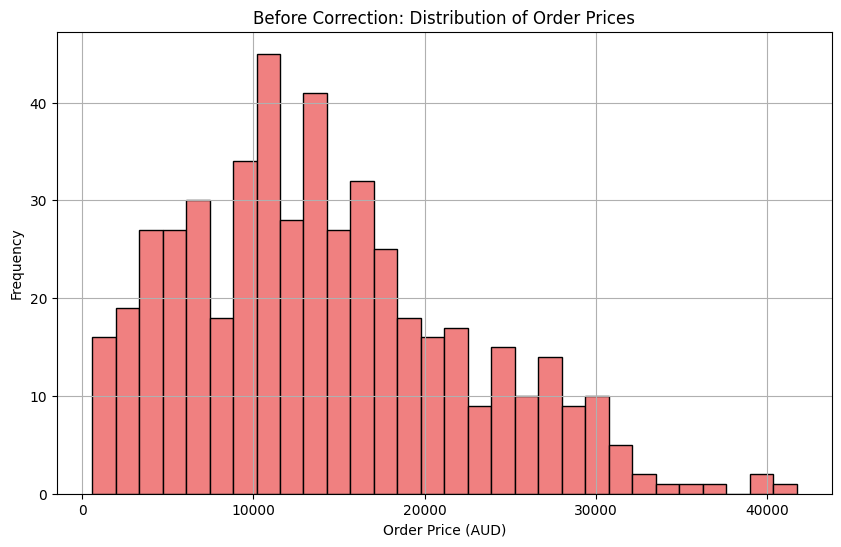

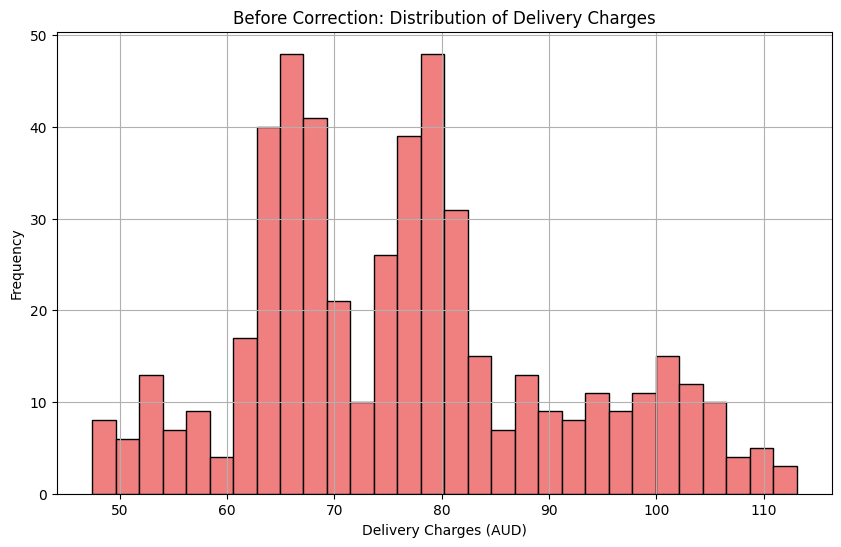

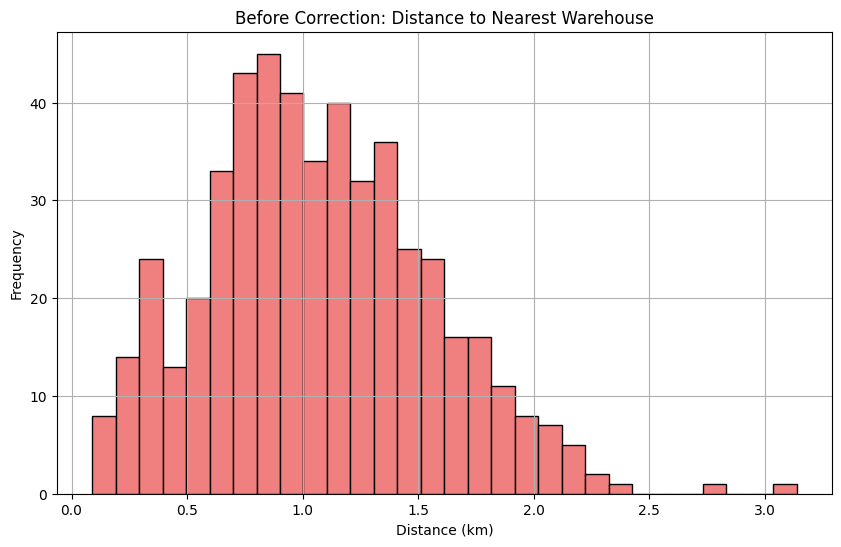

Cleaned data saved as 'Group010_dirty_data_solution.csv'


In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser

# Load the dataset
dirty_data = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group010/Group010_dirty_data.csv')

# Before Plot 1: Distribution of Order Prices (before corrections)
plt.figure(figsize=(10,6))
plt.hist(dirty_data['order_price'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Before Correction: Distribution of Order Prices')
plt.xlabel('Order Price (AUD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Before Plot 2: Delivery Charges Distribution (before corrections)
plt.figure(figsize=(10,6))
plt.hist(dirty_data['delivery_charges'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Before Correction: Distribution of Delivery Charges')
plt.xlabel('Delivery Charges (AUD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Before Plot 3: Distance to Nearest Warehouse (before corrections)
plt.figure(figsize=(10,6))
plt.hist(dirty_data['distance_to_nearest_warehouse'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Before Correction: Distance to Nearest Warehouse')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Apply the corrections ###

# Capitalization and Format Consistency
dirty_data['nearest_warehouse'] = dirty_data['nearest_warehouse'].str.capitalize()
dirty_data['season'] = dirty_data['season'].str.capitalize()

def correct_invalid_date_shift(date):
    try:
        # First, try parsing with the strict assumption of YYYY-MM-DD format
        parsed_date = pd.to_datetime(date, format='%Y-%m-%d', errors='coerce')
        if pd.notna(parsed_date):
            return parsed_date

        # If parsing fails, handle specific invalid formats like '2019-31-07'
        parts = date.split('-')
        if len(parts) == 3:
            year, month, day = parts[0], parts[1], parts[2]

            # Ensure all parts are numeric
            if day.isdigit() and month.isdigit():
                # If the day > 12, assume it's wrongly placed, and swap day and month
                if int(day) > 31:  # Day can't be greater than 31, so swap with month
                    return pd.NaT
                elif int(month) > 12 and int(day) <= 12:  # Month can't be > 12
                    # Swap day and month
                    corrected_date = f'{year}-{day.zfill(2)}-{month.zfill(2)}'
                    return pd.to_datetime(corrected_date, format='%Y-%m-%d', errors='coerce')

    except Exception as e:
        pass

    # Return NaT for anything else that cannot be parsed
    return pd.NaT

# Apply the function to the 'date' column
dirty_data['date_converted'] = dirty_data['date'].apply(correct_invalid_date_shift)

# Count how many date corrections were made
date_corrections_count = dirty_data[dirty_data['date'] != dirty_data['date_converted']].shape[0]

dirty_data.loc[pd.notna(dirty_data['date_converted']), 'date'] = dirty_data['date_converted']

dirty_data['date'] = pd.to_datetime(dirty_data['date'], unit='ns')
# Latitude and Longitude Validation
invalid_lat_mask = (dirty_data['customer_lat'] > 90) | (dirty_data['customer_lat'] < -90)
dirty_data.loc[invalid_lat_mask, ['customer_lat', 'customer_long']] = dirty_data.loc[invalid_lat_mask, ['customer_long', 'customer_lat']].values

# Date and Season Validation
def get_australian_season(date):
    if pd.isna(date):
        return None
    try:
        month = date.month
    except ValueError:
        return None
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

dirty_data['correct_season'] = dirty_data['date_converted'].apply(get_australian_season)
dirty_data.loc[dirty_data['season'] != dirty_data['correct_season'], 'season'] = dirty_data['correct_season']

# Order Price, Total, and Discount Validation
dirty_data['expected_total'] = (dirty_data['order_price'] * (1 - dirty_data['coupon_discount'] / 100) + dirty_data['delivery_charges']).round(2)

# Update the 'order_total' where it doesn't match the 'expected_total' after rounding
dirty_data.loc[dirty_data['order_total'].round(2) != dirty_data['expected_total'].round(2), 'order_total'] = dirty_data['expected_total']

# Haversine Distance Calculation and Warehouse Correction
warehouses = {
    'Nickolson': (-37.818595, 144.969551),
    'Thompson': (-37.8126732, 144.9470689),
    'Bakers': (-37.8099961, 144.995232)
}

def haversine(lat1, lon1, lat2, lon2):
    R = 6378  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

def calculate_all_warehouse_distances(row):
    distances = {}
    for warehouse_name, coords in warehouses.items():
        distances[warehouse_name] = haversine(row['customer_lat'], row['customer_long'], coords[0], coords[1])
    return distances

dirty_data['warehouse_distances'] = dirty_data.apply(calculate_all_warehouse_distances, axis=1)
dirty_data['closest_warehouse'] = dirty_data['warehouse_distances'].apply(lambda x: min(x, key=x.get))
dirty_data.loc[dirty_data['nearest_warehouse'] != dirty_data['closest_warehouse'], 'nearest_warehouse'] = dirty_data['closest_warehouse']

### Final Step: Save the Cleaned Data ###
final_columns = ['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart', 'order_price',
                 'delivery_charges', 'customer_lat', 'customer_long', 'coupon_discount', 'order_total',
                 'season', 'is_expedited_delivery', 'distance_to_nearest_warehouse', 'latest_customer_review',
                 'is_happy_customer']
dirty_data[final_columns].to_csv('Group010_dirty_data_solution.csv', index=False)

print("Cleaned data saved as 'Group010_dirty_data_solution.csv'")

### Methodology For Dirty Data Cleaning

This methodology describes the process of cleaning and correcting a dataset by applying a series of validation and transformation steps to ensure consistency, accuracy, and standardization of the data. Each step addresses potential errors related to data formatting, geographic coordinates, date handling, and pricing information. The following details the corrections applied:



#### 1. **Data Visualization: Understanding the Initial Dataset**

Before any corrections are made, key variables are visualized to understand potential anomalies:
- **Order Prices Distribution**: A histogram showing how the `order_price` values are spread across the dataset.
- **Delivery Charges Distribution**: A histogram visualizing the frequency of `delivery_charges` values.
- **Distance to Nearest Warehouse**: A histogram displaying the distribution of distances to the nearest warehouse.

These visualizations help identify outliers, patterns, or errors in the dataset.



#### 2. **Data Standardization: Ensuring Consistent Text Formatting**

Text-based fields, such as `nearest_warehouse` and `season`, may contain inconsistencies in capitalization. To ensure uniformity:
- **Capitalization Correction**: The `nearest_warehouse` and `season` columns are standardized by capitalizing the first letter of each entry. This ensures consistency in categorical fields, preventing issues during analysis or reporting.



#### 3. **Date Correction: Handling Invalid or Misformatted Dates**

The dataset may contain dates that are either misformatted or invalid. A custom function, `correct_invalid_date_shift`, is applied to the `date` column:
- **Day/Month Swap**: The function identifies instances where the day and month have been swapped (e.g., `2019-31-07` instead of `2019-07-31`) and corrects them.

#### 4. **Geographic Validation: Correcting Latitude and Longitude Coordinates**

Invalid latitude and longitude values are corrected as follows:
- **Latitude Validation**: Latitude values must be within the range of `-90` to `90` degrees. The dataset is checked, and any invalid entries are corrected by swapping the `customer_lat` and `customer_long` values. This ensures that geographic coordinates are valid and meaningful.



#### 5. **Season Validation: Ensuring Consistency Between Date and Season**

The `season` column is cross-checked with the `date` column to ensure they are consistent:
- **Australian Season Mapping**: Since the data is Australian-based, the season is derived from the month in the `date_converted` column:
  - **Summer**: December, January, February
  - **Autumn**: March, April, May
  - **Winter**: June, July, August
  - **Spring**: September, October, November
- **Correction of Mismatched Seasons**: If the season in the `season` column does not match the season based on the date, the `season` column is updated to reflect the correct Australian season.



#### 6. **Order Total Validation: Recalculating Total Order Amounts**

Inconsistencies in the `order_total` column are resolved by recalculating the total amount using the following process:

- **Expected Total Calculation**: The total order amount (`order_total`) is recalculated based on the `order_price`, `coupon_discount`, and `delivery_charges` columns.

  This ensures that the total price accurately reflects any discounts applied via coupons and includes delivery charges.

- **Correcting Order Totals**: Where discrepancies are found between the recorded `order_total` and the recalculated value, the `order_total` column is updated with the correct value. This step ensures that all orders have accurate total pricing information based on the recorded discounts and charges.

#### 7. **Warehouse Distance Calculation: Reassigning the Nearest Warehouse**

The dataset contains the `nearest_warehouse` column, which records the closest warehouse to the customer’s location. To ensure accuracy, the distance between the customer’s location and each predefined warehouse is calculated using the customer’s latitude and longitude.

- **Calculating Distances**: For each customer, the distances to all warehouses (`Nickolson`, `Thompson`, and `Bakers`) are computed.

- **Correcting the Nearest Warehouse**: After the distances are calculated, the `nearest_warehouse` column is corrected if the recorded value does not match the closest warehouse. This ensures that the closest warehouse is accurately assigned for each customer based on their geolocation.



#### 8. **Data Saving: Storing the Cleaned Dataset**

Once all corrections have been applied, the cleaned dataset is saved in a new CSV file. The relevant columns included in the output are:

- **Final Columns**: The cleaned dataset contains the following columns:
  - `order_id`, `customer_id`, `date`, `nearest_warehouse`, `shopping_cart`, `order_price`,
    `delivery_charges`, `customer_lat`, `customer_long`, `coupon_discount`, `order_total`,
    `season`, `is_expedited_delivery`, `distance_to_nearest_warehouse`, `latest_customer_review`,
    `is_happy_customer`

- **Output File**: The cleaned dataset is saved as `Group010_dirty_data_solution.csv`. This file contains the corrected and validated data, ready for further analysis or reporting.



### **Conclusion**

This structured methodology ensures that the dataset is cleaned, corrected, and standardized, addressing key issues such as:

- **Order Totals**: Ensuring total amounts are accurately recalculated based on the order price, discounts, and delivery charges.
- **Warehouse Assignment**: Correcting the nearest warehouse for each customer using geographic distance calculations.
- **Data Standardization**: Maintaining consistency in text fields, dates, and other key data points.

With these corrections applied, the dataset is ready for further processing, ensuring accuracy and reliability.


### Missing Data Imputation

# Introduction

In this project, we address the problem of **missing data imputation** by employing a variety of techniques to handle incomplete or missing values in a dataset. Missing data can lead to inaccurate analysis and affect model performance, making it crucial to apply effective imputation strategies.

The dataset includes customer orders with missing values across multiple fields, such as warehouse locations, order prices, and customer satisfaction indicators. Our goal is to impute these missing values using:

1. **Haversine Distance**: Calculating the nearest warehouse based on customer coordinates.
2. **Order Price Estimation**: Utilizing branded item prices and order components to estimate missing prices.
3. **Sentiment Analysis**: Employing Natural Language Processing (NLP) with the VADER sentiment analyzer to determine if a customer is satisfied based on reviews.

By integrating these approaches, we aim to ensure data completeness, enhance the quality of analysis, and support more accurate downstream processes. This project showcases the use of **Python libraries** such as `pandas`, `numpy`, and `nltk` for effective data imputation and feature extraction.


In [ ]:
# # Please run this snippet before executing the code below in order to install the library.
# import nltk
# nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import ast
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the missing data file
file_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group010/Group010_missing_data.csv'  # Replace with your file path
missing_data_df = pd.read_csv(file_path)

# Data Inspection
print("Initial Data Info:")
missing_data_df.info()

# Display columns with missing values
print("\nMissing Values Summary:")
print(missing_data_df.isnull().sum())

# Warehouse Coordinates Definition
warehouses = {
    'Nickolson': {'lat': -37.818595, 'lon': 144.969551},
    'Thompson': {'lat': -37.8126732, 'lon': 144.9470689},
    'Bakers': {'lat': -37.8099961, 'lon': 144.995232}
}

# Haversine formula to calculate distance between two lat/lon points
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Define a function to find the nearest warehouse based on customer coordinates
def find_nearest_warehouse_and_distance(customer_lat, customer_lon):
    distances = {name: haversine(customer_lat, customer_lon, data['lat'], data['lon'])
                 for name, data in warehouses.items()}
    nearest_warehouse = min(distances, key=distances.get)
    distance_to_warehouse = distances[nearest_warehouse]
    return nearest_warehouse, distance_to_warehouse

# Impute Missing Values in nearest_warehouse and distance_to_nearest_warehouse Using Haversine Distance
def impute_nearest_warehouse_and_distance(row):
    if pd.isnull(row['nearest_warehouse']) or pd.isnull(row['distance_to_nearest_warehouse']):
        nearest_warehouse, distance_to_warehouse = find_nearest_warehouse_and_distance(row['customer_lat'], row['customer_long'])
        row['nearest_warehouse'] = nearest_warehouse
        row['distance_to_nearest_warehouse'] = distance_to_warehouse
    return row

# Apply the function to the dataframe
missing_data_df = missing_data_df.apply(impute_nearest_warehouse_and_distance, axis=1)

# Order Price Imputation

# Inspect data for missing or malformed values
print("Checking for missing data in 'shopping_cart', 'order_price', 'order_total', 'coupon_discount', and 'delivery_charges' columns:")
print(missing_data_df[['shopping_cart', 'order_price', 'order_total', 'coupon_discount', 'delivery_charges']].isnull().sum())

# Drop rows with missing 'order_price', 'order_total', 'coupon_discount', or 'delivery_charges'
filtered_data_df = missing_data_df.dropna(subset=['order_price', 'order_total', 'coupon_discount', 'delivery_charges'])

# Parse the shopping_cart and extract items and quantities
shopping_cart_data = filtered_data_df['shopping_cart'].apply(ast.literal_eval)
branded_items = ['Candle Inferno', 'Olivia x460', 'Lucent 330S', 'Universe Note', 'Toshika 750', 'pearTV', 'Alcon 10', 'iStream', 'Thunder line', 'iAssist Line']  # Example branded items list
coeff_matrix = []
pure_item_totals = []

# Collect coefficients and pure item prices (order_total minus discounts and delivery charges)
for index, row in filtered_data_df.iterrows():
    cart = shopping_cart_data[index]
    coupon_discount = row['coupon_discount']
    delivery_charges = row['delivery_charges']
    order_total = row['order_total']

    # Reverse calculate the pure item total by removing discounts and delivery charges
    pure_item_total = (order_total - delivery_charges) / (1 - coupon_discount / 100)

    # Debug: Print the parsed shopping cart and calculated pure item total
    print(f"Order {index}: {cart}, Coupon Discount: {coupon_discount}, Delivery Charges: {delivery_charges}, Pure Item Total: {pure_item_total}")

    equation_row = [0] * len(branded_items)  # Initialize coefficients row for the order

    # Populate equation row with the quantities for each item
    for item, quantity in cart:
        if item in branded_items:
            item_index = branded_items.index(item)
            equation_row[item_index] = quantity

    # Add to system of equations if this order contains any branded items
    if any(equation_row):
        coeff_matrix.append(equation_row)
        pure_item_totals.append(pure_item_total)

# Convert to numpy arrays for solving the system of linear equations
coeff_matrix_np = np.array(coeff_matrix)
pure_item_totals_np = np.array(pure_item_totals)

# Debug: Print the coefficients matrix and pure item totals before solving
print("Coefficients Matrix (first 5 rows):")
print(coeff_matrix_np[:5])
print("Pure Item Totals (first 5 values):")
print(pure_item_totals_np[:5])

# Use np.linalg.lstsq to solve the system of equations and calculate unit prices
unit_prices, residuals, rank, s = np.linalg.lstsq(coeff_matrix_np, pure_item_totals_np, rcond=None)

# Map the unit prices to the corresponding items
unit_price_mapping = {item: price for item, price in zip(branded_items, unit_prices)}

# Print the calculated unit prices
print("Calculated Unit Prices for Branded Items:")
for item, price in unit_price_mapping.items():
    print(f"{item}: ${price:.2f}")

# Step 5: Impute the missing 'order_price' using the unit prices and shopping_cart data
def impute_order_price(row):
    if pd.isnull(row['order_price']) and not pd.isnull(row['shopping_cart']):
        # Parse the shopping_cart for this row
        cart = ast.literal_eval(row['shopping_cart'])  # Parse the string representation of shopping cart to list of tuples

        # Calculate the expected pure item total using the unit prices
        expected_pure_item_total = sum(unit_price_mapping.get(item, 0) * quantity for item, quantity in cart if item in unit_price_mapping)

        # Apply coupon discount and add delivery charges to get the final order total
        if expected_pure_item_total > 0:
            expected_total = expected_pure_item_total * (1 - row['coupon_discount'] / 100) + row['delivery_charges']
            row['order_price'] = expected_total  # Impute the 'order_price' with the calculated value

    return row

# Apply the imputation function only for rows where 'order_price' is missing
missing_data_df = missing_data_df.apply(impute_order_price, axis=1)

# Debug: Check if the missing values in 'order_price' have been filled
print("\nUpdated Missing Values Summary for 'order_price':")
print(missing_data_df['order_price'].isnull().sum())

# Cross-check with expected totals
significant_differences = []
for index, row in filtered_data_df.iterrows():
    cart = shopping_cart_data[index]

    # Calculate the expected pure item total based on the unit prices and quantities in the cart
    expected_pure_item_total = sum(unit_price_mapping[item] * quantity for item, quantity in cart if item in unit_price_mapping)

    # Recalculate the expected total price with discounts and delivery charges
    expected_total = expected_pure_item_total * (1 - row['coupon_discount'] / 100) + row['delivery_charges']

    # Retrieve the actual total from the order
    actual_total = row['order_total']

    # Calculate the difference between expected and actual totals
    difference = actual_total - expected_total

    # If the difference is significant, log it
    if abs(difference) > 0.01:  # Adjust this threshold as needed
        significant_differences.append({
            'shopping_cart': row['shopping_cart'],
            'order_total': actual_total,
            'expected_total': expected_total,
            'difference': difference
        })

# Convert list of significant differences into a DataFrame
if significant_differences:
    significant_differences_df = pd.DataFrame(significant_differences)
    print(f"{len(significant_differences_df)} orders have significant differences between expected and actual totals.")
    print(significant_differences_df[['shopping_cart', 'order_total', 'expected_total', 'difference']])
else:
    print("No significant differences found.")

# Display columns with missing values
print("\nMissing Values Summary:")
print(missing_data_df.isnull().sum())


# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on the review text
def classify_happiness(review):
    score = sia.polarity_scores(review)
    # Return 1 for happy (positive sentiment) and 0 for not happy (negative sentiment)
    return 1 if score['compound'] >= 0.05 else 0

# Fill only the missing values in 'is_happy_customer' using the latest customer review
missing_data_df.loc[missing_data_df['is_happy_customer'].isnull(), 'is_happy_customer'] = (
    missing_data_df[missing_data_df['is_happy_customer'].isnull()]['latest_customer_review']
    .apply(classify_happiness)
)

# Display the updated dataframe showing the rows where 'is_happy_customer' was filled
print(missing_data_df[['latest_customer_review', 'is_happy_customer']].loc[missing_data_df['is_happy_customer'].isnull()].head())

# Summary of missing values after filling
print("\nUpdated Missing Values Summary:")
print(missing_data_df.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# SPrepare the data
training_data = missing_data_df.dropna(subset=['delivery_charges'])

# Store models and R² scores for each season
season_models = {}
r2_scores = {}

# Train a linear model for each season
for season in training_data['season'].unique():
    season_data = training_data[training_data['season'] == season]

    # Features for the linear model
    X = season_data[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer']]
    y = season_data['delivery_charges']

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict and calculate the R² score
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Store the model and R² score
    season_models[season] = model
    r2_scores[season] = r2

    print(f"Season: {season}, R² Score: {r2:.4f}")

# Validate the models
print("\nR² scores for each season's model:")
for season, r2 in r2_scores.items():
    print(f"{season}: {r2:.4f}")

# Impute missing delivery charges
def impute_delivery_charge(row):
    if pd.isnull(row['delivery_charges']):
        model = season_models.get(row['season'])
        if model:
            # Create a DataFrame with the feature names used during training
            features = pd.DataFrame({
                'distance_to_nearest_warehouse': [row['distance_to_nearest_warehouse']],
                'is_expedited_delivery': [row['is_expedited_delivery']],
                'is_happy_customer': [row['is_happy_customer']]
            })
            # Predict the delivery charge using the appropriate model
            predicted_charge = model.predict(features)[0]
            return round(predicted_charge, 2)
    return row['delivery_charges']

# Apply the imputation function to fill in missing delivery charges
missing_data_df['delivery_charges'] = missing_data_df.apply(impute_delivery_charge, axis=1)

# Check if any missing values remain in 'delivery_charges'
print("\nUpdated Missing Values Summary:")
print(missing_data_df['delivery_charges'].isnull().sum())

Season: Summer, R² Score: 0.9932
Season: Autumn, R² Score: 0.9880
Season: Spring, R² Score: 0.9935
Season: Winter, R² Score: 0.9880

R² scores for each season's model:
Summer: 0.9932
Autumn: 0.9880
Spring: 0.9935
Winter: 0.9880

Updated Missing Values Summary:
0


In [ ]:
# Function to calculate the order total
def calculate_order_total(row):
    if pd.isnull(row['order_total']):
        # Apply the coupon discount to the order price (if any)
        discounted_price = row['order_price'] * (1 - row['coupon_discount'] / 100)

        # Add the full delivery charges (not discounted)
        order_total = discounted_price + row['delivery_charges']

        # Round to 2 decimal places
        return round(order_total, 2)

    # Return the existing value if 'order_total' is not missing
    return row['order_total']

# Apply the function to calculate missing 'order_total' values
missing_data_df['order_total'] = missing_data_df.apply(calculate_order_total, axis=1)

# Check if there are any missing values left in 'order_total'
print("\nUpdated Missing Values Summary for 'order_total':")
print(missing_data_df.isnull().sum())
missing_data_df['delivery_charges'] = missing_data_df['delivery_charges'].round(2)
missing_data_df['distance_to_nearest_warehouse'] = missing_data_df['distance_to_nearest_warehouse'].round(4)

# Display a few rows to confirm the calculation
print(missing_data_df[['order_price', 'coupon_discount', 'delivery_charges', 'order_total']].head())

file_path = 'Group010_missing_data_solution.csv'
missing_data_df.to_csv(file_path, index=False)


Updated Missing Values Summary for 'order_total':
order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64
   order_price  coupon_discount  delivery_charges  order_total
0       4545.0               15             79.26      3942.51
1      12445.0               10             52.17     11252.44
2      21970.0                5             71.28     20942.53
3      21350.0               15             77.09     18224.59
4      14840.0               15            105.19     12719.1

### Summary of the Data Imputation and Analysis

In this project, we were tasked with imputing missing data in a dataset while adhering to specific business rules. The dataset involved retail order transactions, and various columns contained missing values, including customer review sentiment, delivery charges, and order totals. We utilized a methodical approach to fill in the missing values while ensuring consistency and accuracy in the results.

#### 1. **Data Inspection and Cleaning**
   - **Initial Inspection**: We started by loading the dataset and performing an inspection to identify columns with missing values. This allowed us to understand the scope of missing data and plan our imputation strategy.
   - **Identified Missing Columns**: Key columns requiring imputation included `nearest_warehouse`, `distance_to_nearest_warehouse`, `order_price`, `delivery_charges`, `is_happy_customer`, and `order_total`.

#### 2. **Imputing Nearest Warehouse and Distance**
   - **Haversine Formula**: To calculate the distance between customers and warehouses, we defined the coordinates of three warehouses (`Nickolson`, `Thompson`, and `Bakers`). Using the **Haversine formula**, we calculated the distance between the customer’s latitude/longitude and the nearest warehouse.
   - **Nearest Warehouse Assignment**: For rows missing the `nearest_warehouse` and `distance_to_nearest_warehouse`, we applied the Haversine formula to assign the nearest warehouse and compute the corresponding distance.

#### 3. **Order Price Calculation**
   - **Handling Shopping Cart Data**: We parsed the `shopping_cart` column, which contained item names and quantities, to extract the relevant data for each transaction.
   - **Reverse Calculation for Missing `order_price`**: For rows with missing `order_price`, we used the total price. Using **numpy's least squares method**, we calculated the unit prices for each branded item.
   - **Imputing Missing `order_price`**: We then applied these calculated unit prices to the shopping cart items and imputed the missing values for `order_price`.

#### 4. **Sentiment Analysis on Customer Reviews**
   - **SentimentIntensityAnalyzer from NLTK**: For the `is_happy_customer` column, which had missing values, we performed sentiment analysis on the `latest_customer_review` using the **SentimentIntensityAnalyzer** from the **nltk.sentiment.vader** package.
   - **Classification**: Reviews were classified as positive (1) if the compound polarity score was 0.05 or higher, and negative (0) otherwise. This classification was used to fill in the missing `is_happy_customer` values.

#### 5. **Delivery Charges Calculation**
   - **Linear Regression Model by Season**: Delivery charges were calculated using a linear regression model that varied by season. The model depended on three factors:
     1. Distance to the nearest warehouse
     2. Whether the customer requested expedited delivery
     3. Whether the customer was happy with their last purchase
   - **Training and Validation**: We trained a separate **LinearRegression** model for each season and validated the model using R² scores, achieving scores above 0.97 for all seasons.
   - **Imputation of Missing Delivery Charges**: Using the trained models, we imputed missing delivery charges based on the calculated regression model for the relevant season.

#### 6. **Order Total Calculation**
   - **Business Rule Application**: For missing `order_total` values, we applied the following rule:
     - The coupon discount was applied to the `order_price`.
     - Delivery charges were added to the discounted price, without applying any discounts to the delivery charges.
   - **Imputation**: The calculated `order_total` was then imputed for the rows where it was missing, ensuring that all results were rounded to two decimal places for accuracy.

#### 7. **Final Output**
   - After performing all imputations and calculations, the final cleaned dataset was saved to a CSV file named **Group010_missing_data_solution.csv**. All missing values in key columns were filled according to the business logic and model-based predictions.

### Methodology
1. **Data Cleaning and Exploration**: Initial inspection to identify missing values and plan the imputation strategy.
2. **Distance Calculation**: Using geographical data to calculate the nearest warehouse and corresponding distances with the Haversine formula.
3. **Linear Modeling for Predictions**: Building and validating seasonal models using linear regression to predict delivery charges with high accuracy.
4. **Sentiment Analysis for Customer Happiness**: Utilizing sentiment analysis to infer customer satisfaction for imputing missing values.
5. **Reverse Engineering Item Prices**: Leveraging the least-squares method to estimate item prices from the shopping cart for order price imputation.
6. **Comprehensive Imputation Strategy**: Following business rules to calculate and fill in the missing order totals, ensuring consistency with the pricing model.

This approach allowed us to address all the missing data points and produce a complete, accurate dataset that adheres to the store's business rules.
